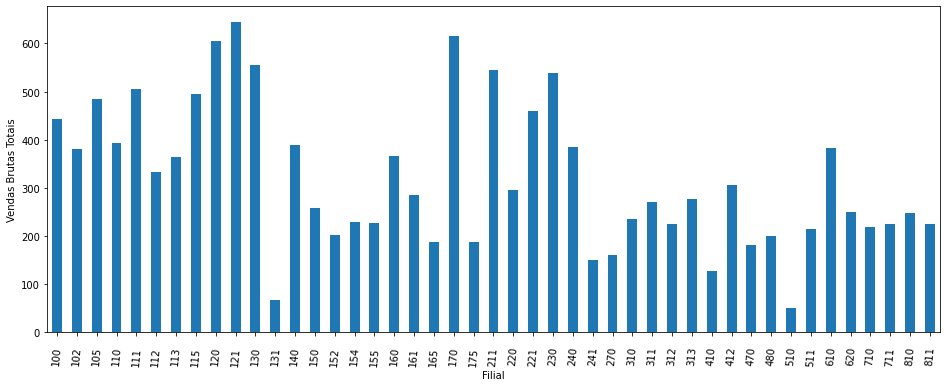

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados
caminho_base = r"C:\Users\Pichau\Downloads\teste.xlsx"
nome_aba = "Base de Dados"
df_base = pd.read_excel(caminho_base, sheet_name=nome_aba)

# Agrupa as vendas brutas totais por filial e soma as vendas
df_vendas = df_base.groupby("Filial")["Vendas Brutas Total"].sum()

# Plota o gráfico de barras
fig, ax = plt.subplots(figsize=(16, 6))  # define o tamanho da figura
df_vendas.plot(kind="bar", ax=ax)  # passa o objeto ax para plotar no mesmo eixo
ax.set_xlabel("Filial")
ax.set_ylabel("Vendas Brutas Totais")
ax.tick_params(axis='x', labelrotation=85, labelsize=10, pad=10)  # ajusta o espaçamento entre os valores do eixo x

plt.show()

caminho_imagem = r"C:\Users\Pichau\Downloads\grafico_vendas.png"
fig.savefig(caminho_imagem, bbox_inches="tight")  # bbox_inches="tight" ajusta a posição da legenda no gráfico



In [62]:
import win32com.client as win32
import pandas as pd

# Define as filiais desejadas e os e-mails correspondentes
filiais = [100, 810]
emails = {100: ['lcarillo97@hotmail.com', 'cibele.malta@verisure.com.br'],
          810: ['lcarillo97@hotmail.com', 'cibele.malta@verisure.com.br']}

# Carrega a base de dados
caminho_base = r"C:\Users\Pichau\Downloads\teste.xlsx"
nome_aba = "Base de Dados"
df_base = pd.read_excel(caminho_base, sheet_name=nome_aba)

# Converte a coluna "Filial" em número
df_base["Filial"] = df_base["Filial"].astype(int)

# Filtra as linhas pelas filiais desejadas e cria um arquivo Excel para cada filial
for filial in filiais:
    df_filtrado = df_base[df_base["Filial"] == filial]
    caminho_arquivo = f"C:\\Users\\Pichau\\Downloads\\{filial}.xlsx"
    df_filtrado.to_excel(caminho_arquivo, index=False)

    # Define o caminho para a imagem que será adicionada ao e-mail
    caminho_imagem = r"C:\Users\Pichau\Downloads\grafico_vendas.png"

    # Define o conteúdo HTML do corpo do e-mail, incluindo a tag <img> com o caminho da imagem
    html_body = f'<html><body>Segue em anexo o arquivo solicitado. <br><img src="{caminho_imagem}"></body></html>'

    # Cria o objeto de e-mail do Outlook e define as propriedades necessárias
    outlook = win32.Dispatch('outlook.application')
    email = outlook.CreateItem(0)
    email.To = ';'.join(emails[filial])
    email.Subject = f'Arquivo {filial}.xlsx'
    email.HTMLBody = html_body

    # Adiciona o anexo do arquivo Excel
    anexo = caminho_arquivo
    email.Attachments.Add(anexo)

    # Envia o e-mail
    email.Send()
